- Daniel Morales - 21785
- Brandon Sicay - 21757
- Diana Fern√°ndez - 21747

##2.2 Crecimiento poblacional

La poblaci√≥n despu√©s de 12 d√≠as es aproximadamente 232.19 mariposas.
La poblaci√≥n alcanza 150 mariposas en aproximadamente 9 d√≠as.


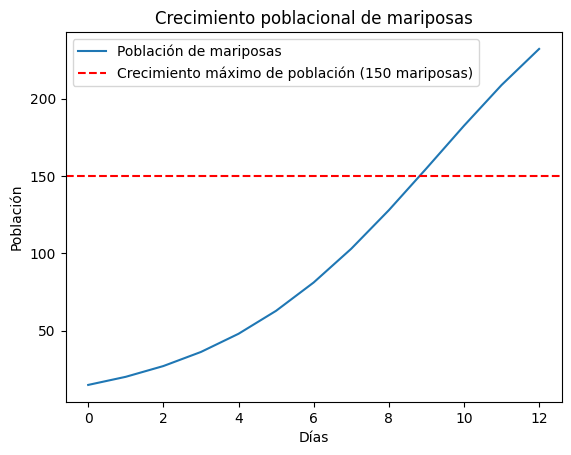

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Datos iniciales
y0 = 15
y4 = 56
N = 300
t0 = 0
t4 = 4
t12 = 12

# Definimos la funci√≥n para encontrar k
def find_k(k):
    return y0 * np.exp(k * t4) / (1 + (y0 / N) * (np.exp(k * t4) - 1)) - y4

# Encontramos k usando fsolve
k_initial_guess = 0.1
k = fsolve(find_k, k_initial_guess)[0]

# M√©todo de Euler
def euler_method(k, y0, N, t0, t_final, step_size):
    t_values = np.arange(t0, t_final + step_size, step_size)
    y_values = np.zeros(len(t_values))
    y_values[0] = y0

    for i in range(1, len(t_values)):
        y_values[i] = y_values[i-1] + step_size * k * (1 - y_values[i-1] / N) * y_values[i-1]

    return t_values, y_values

# Aplicamos el m√©todo de Euler
t_values, y_values = euler_method(k, y0, N, t0, t12, 1)

# Imprimimos el resultado
y_12_days = y_values[-1]
print(f'La poblaci√≥n despu√©s de 12 d√≠as es aproximadamente {y_12_days:.2f} mariposas.')

# Encontramos el tiempo en que la poblaci√≥n es de 150 mariposas
def find_time_to_150(y_values, t_values):
    for t, y in zip(t_values, y_values):
        if y >= 150:
            return t
    return None

time_to_150 = find_time_to_150(y_values, t_values)
print(f'La poblaci√≥n alcanza 150 mariposas en aproximadamente {time_to_150} d√≠as.')

# Graficamos los resultados
plt.plot(t_values, y_values, label='Poblaci√≥n de mariposas')
plt.axhline(150, color='r', linestyle='--', label='Crecimiento m√°ximo de poblaci√≥n (150 mariposas)')
plt.xlabel('D√≠as')
plt.ylabel('Poblaci√≥n')
plt.legend()
plt.title('Crecimiento poblacional de mariposas')
plt.show()

##2.2 Crecimiento Epidemiol√≥gico
En un pueblo aislado se propaga una enfermedad seg√∫n el modelo SIR. Inicialmente hay 990 individuos
susceptibles (S), 10 individuos infectados (I) y 0 individuos recuperados (R). La tasa de infecci√≥n (ùõΩ) es 0.3 y la tasa
de recuperaci√≥n (ùõæ) es 0.1. Utilizando el m√©todo de Euler, estime el n√∫mero de individuos susceptibles, infectados y
recuperados durante un per√≠odo de 50 d√≠as. Utilice un tama√±o de paso (Œît) de 0.1 d√≠as

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Par√°metros iniciales
S0 = 990  # Susceptibles
I0 = 10   # Infectados
R0 = 0    # Recuperados
beta = 0.3  # Tasa de infecci√≥n
gamma = 0.1  # Tasa de recuperaci√≥n
dt = 0.1  # Tama√±o de paso en d√≠as
t_final = 50  # Periodo total de simulaci√≥n en d√≠as
N = S0 + I0 + R0  # Poblaci√≥n total

In [3]:
# N√∫mero de pasos de tiempo
num_steps = int(t_final / dt) + 1

# Inicializaci√≥n de los arrays que guardar√°n los valores de S, I, R
S = np.zeros(num_steps)
I = np.zeros(num_steps)
R = np.zeros(num_steps)
t = np.linspace(0, t_final, num_steps)  # Vector de tiempo
# Valores iniciales
S[0], I[0], R[0] = S0, I0, R0


In [4]:
# Implementaci√≥n del m√©todo de Euler
for step in range(1, num_steps):
    dS_dt = -beta * S[step - 1] * I[step - 1] / N
    dI_dt = beta * S[step - 1] * I[step - 1] / N - gamma * I[step - 1]
    dR_dt = gamma * I[step - 1]

    S[step] = S[step - 1] + dS_dt * dt
    I[step] = I[step - 1] + dI_dt * dt
    R[step] = R[step - 1] + dR_dt * dt

    # Asegurando que las poblaciones nunca sean negativas
    S[step] = max(S[step], 0)
    I[step] = max(I[step], 0)
    R[step] = max(R[step], 0)

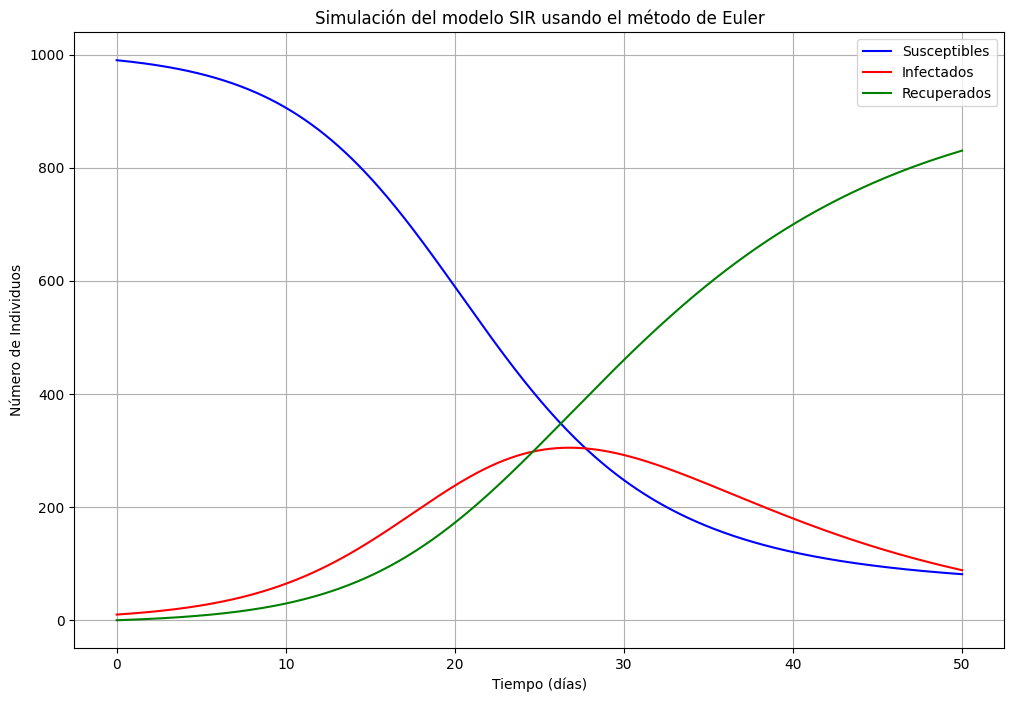

In [5]:
# Resultados

plt.figure(figsize=(12, 8))
plt.plot(t, S, label='Susceptibles', color='blue')
plt.plot(t, I, label='Infectados', color='red')
plt.plot(t, R, label='Recuperados', color='green')
plt.title('Simulaci√≥n del modelo SIR usando el m√©todo de Euler')
plt.xlabel('Tiempo (d√≠as)')
plt.ylabel('N√∫mero de Individuos')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
print (f'N√∫mero de individuos infectados al d√≠a 50 es: {I[-1]:.0f}')
print (f'N√∫mero de individuos recuperados al d√≠a 50 es: {R[-1]:.0f}')
print (f'N√∫mero de individuos susceptibles al d√≠a 50 es: {S[-1]:.0f}')

N√∫mero de individuos infectados al d√≠a 50 es: 88
N√∫mero de individuos recuperados al d√≠a 50 es: 830
N√∫mero de individuos susceptibles al d√≠a 50 es: 81
